In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
import lsst.sims.featureScheduler as fs
from speed_observatory import Speed_observatory


/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
survey_length = 2.5  # days
# Define what we want the final visit ratio map to look like
target_maps = fs.standard_goals()

filters = ['r', 'i']
weights = {}
weights['r'] = [1., 1., 1.]
weights['i'] = [2., 1., 0.]
surveys = []
for filtername in filters:
    bfs = []
    bfs.append(fs.Depth_percentile_basis_function(filtername=filtername))
    bfs.append(fs.Target_map_basis_function(target_map=target_maps[filtername], 
                                           filtername=filtername))
    bfs.append(fs.Filter_change_basis_function(filtername=filtername))
    weight = weights[filtername]
    surveys.append(fs.Simple_greedy_survey_fields(bfs, weight, filtername=filtername))

scheduler = fs.Core_scheduler(surveys)

observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler, survey_length=survey_length)


Completed 2014 observations


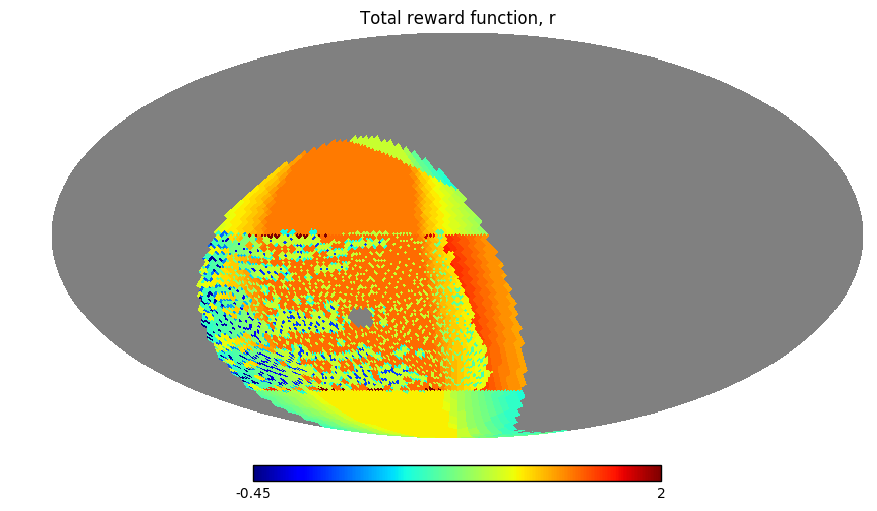

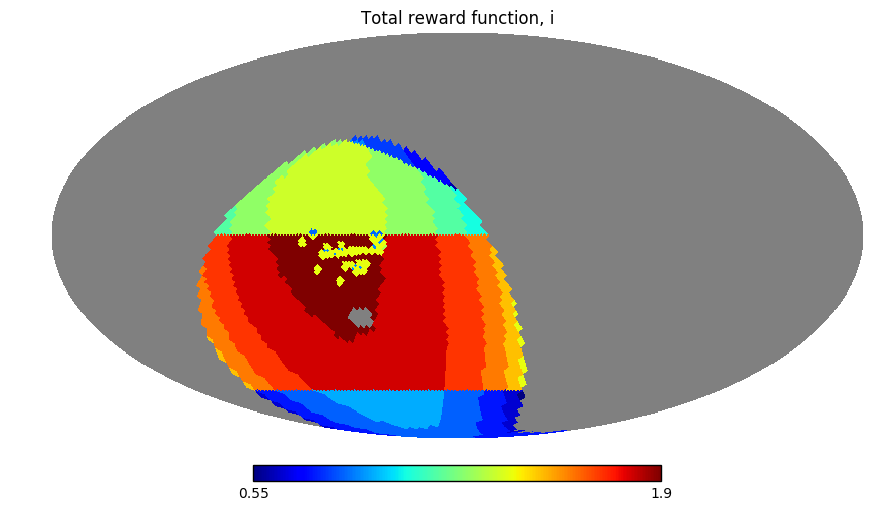

In [15]:
for fn, survey in zip(filters, scheduler.surveys):
    hp.mollview(survey.calc_reward_function(), title=r'Total reward function, $%s$' % fn)

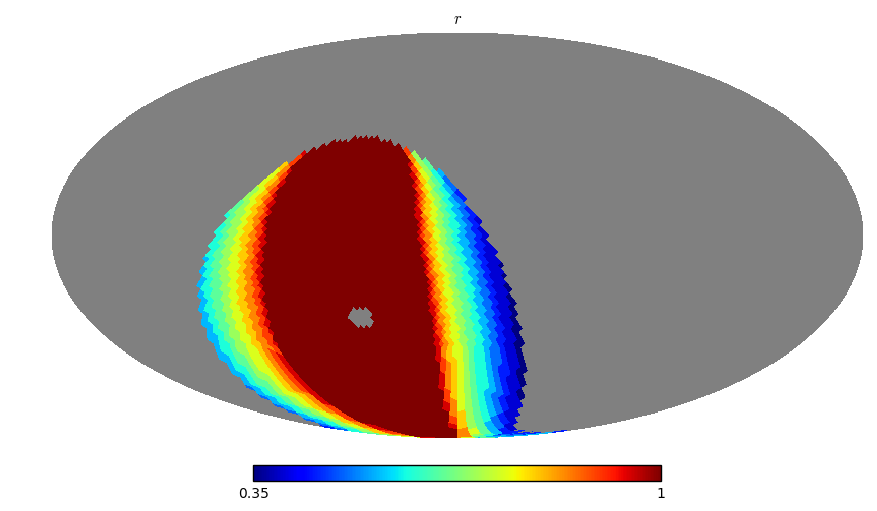

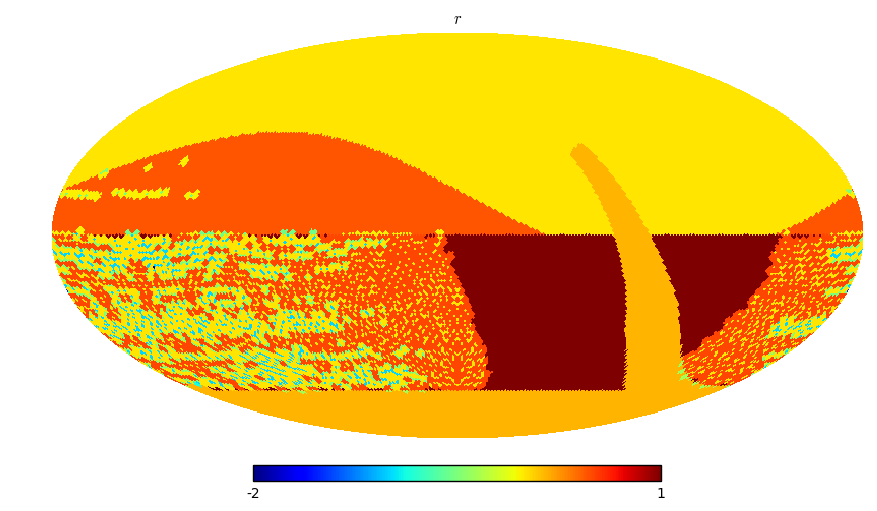

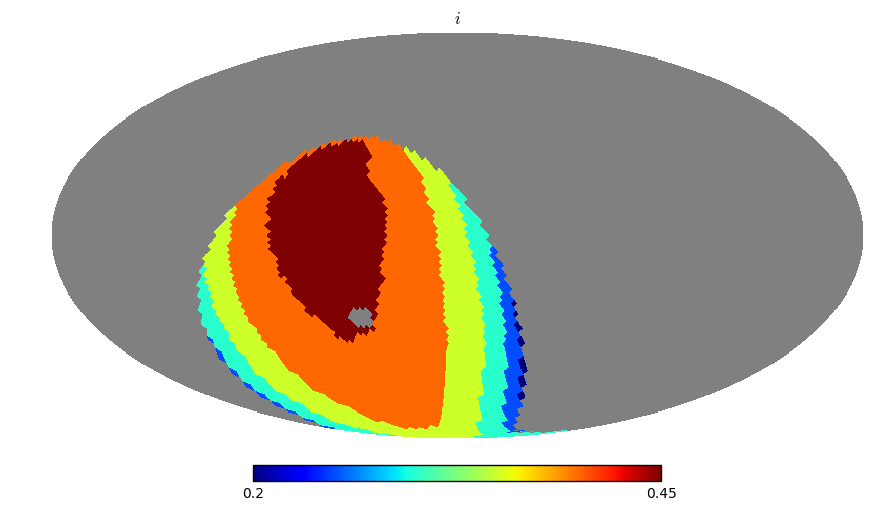

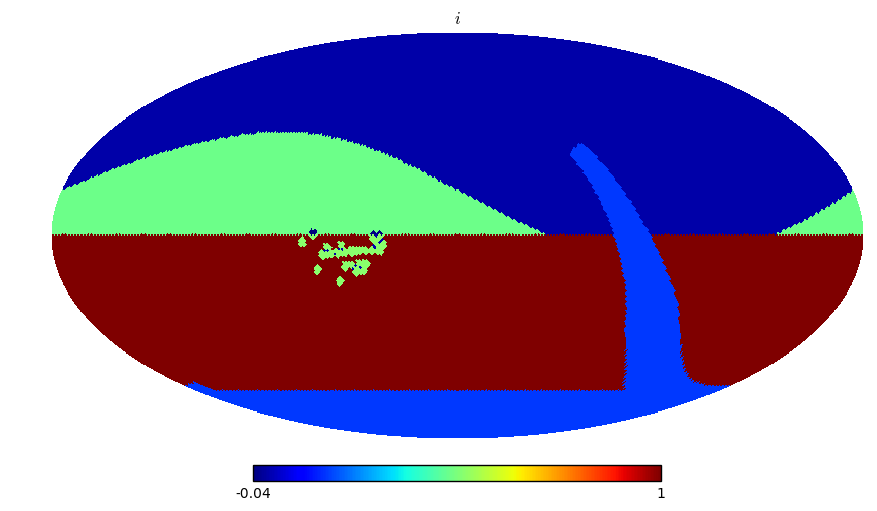

In [18]:
for fn, survey in zip(filters, scheduler.surveys):
    for basis_function in survey.basis_functions:
        reward = basis_function()
        if np.size(reward) > 1:
            hp.mollview(reward, title='$%s$' % fn)

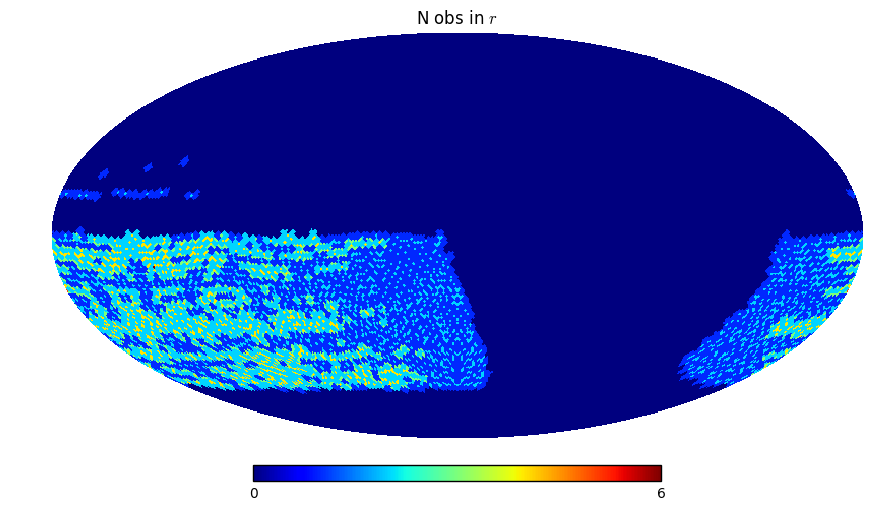

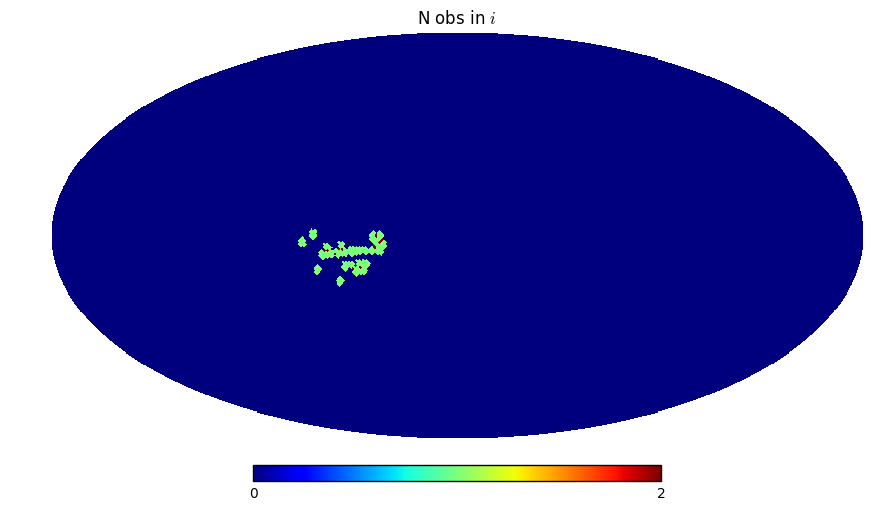

In [19]:
# Drill down to look at individual features
for fn, survey in zip(filters, scheduler.surveys):
    hp.mollview(survey.basis_functions[1].survey_features['N_obs'].feature, 
                title=r'N obs in $%s$' % fn)